In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns
from IPython.display import display, Markdown
az.style.use('arviz-darkgrid')
np.random.seed(44)


In [2]:
import seaborn as sns
sns.set_theme()
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams.update({
    "figure.figsize": [8, 4],
    'figure.facecolor': '#fffff8',
    'axes.facecolor': '#fffff8',
    'figure.constrained_layout.use': True,
    'font.size': 14.0,
    'hist.bins': 'auto',
    'lines.linewidth': 3.0,
    'lines.markeredgewidth': 2.0,
    'lines.markerfacecolor': 'none',
    'lines.markersize': 8.0, 
})
sns.set(rc={'figure.figsize':(8,4)})

# Linear regression


Giorgio Corani <br/>
*Bayesian Data Analysis and Probabilistic Programming*
<br/>
<br/>
``giorgio.corani@supsi.ch``





# Outline
* Traditional linear regression
* Probabilistic linear regression
* Robust linear regression

# Credits 


*  Mostly based on Chapter 3 of O. Martin, *Bayesian Analysis with Python, Second Edition*.

* The discussion of traditional linear regression is based on Sec 5.1 ( <a href="https://otexts.com/fpp2/regression-intro.html">https://otexts.com/fpp2/regression-intro.html</a>) of the online book <a href="https://otexts.com/fpp2/"> Forecasting: Principles and Practice </a> by Rob J Hyndman and George Athanasopoulos

*  NOtebook by G. Corani

# Linear regression

* Suppose we have a variable $x$ and we want to predict $y$. 
* We have paired observations $\{(x_1,y_1), (x_2,y_2), (x_3,y_3),\dots (x_n,y_n)\}$. 
*  $y$ is the *dependent* (or  *response*) variable
*  $x$  is the *independent*  (or *explanatory*  or *covariate*)  variable



# Simple linear regression

$$y_i = \alpha + x_i \beta  + \epsilon_i$$


* $y_i$ and $x_i$ denote the observation of $x$ and $y$ in the $i$-th row of data.

* $\beta$ (*slope*): average predicted change in $y$  for a unit change in  $x$. 

* $\alpha$ (*intercept*):  predicted value of $y$ for $x$ = 0.

* $\epsilon_i$ is a noise affecting the $i$-th observation, so that  the observations do not lie on the straight line but are scattered around it. 

# Simple linear regression

<img src='img/linreg.png' width=600 align="center" > 

$$y_i = \alpha + x_i \beta  + \epsilon_i$$


*   The noise term $\epsilon_i$ implies a deviation from the  linear model. It captures anything that may affect $y_i$ other than $x_i$.

# Assumptions about  $\epsilon$

We assume the noise $\epsilon$ :

*  to have mean zero; otherwise the prediction will be systematically biased;
*  to be  normally distributed with  variance $\sigma^2_{\epsilon}$;
*   to be independent from the value of $y$.

Thus, we assume $\epsilon_i \sim N(0, \sigma^2_{\epsilon})$.

# Multiple linear regression

* Linear regression with $k$ explanatory variables:

\begin{align}
 y_i= \alpha+ β_1 x_{i,1} t + β_2 x_{i,2}  +⋯+\beta_{i,k} +ε_i,
\end{align}

* $x_{i,j}$: observation of the $j$-th explanatory variable in the $i$-th row of data

* The coefficients $\beta_1,…,\beta_k$ measure the effect of each predictor after taking into account the effects of all the other predictors in the model.

* They measure the *marginal effects* of each  explanatory variable.

# Traditional estimation

# Least square estimation for simple regression

* We need to estimate from data the coefficients $\alpha, \beta$.

*  The estimated coefficients are referred to as  $\hat{\alpha}, \hat{\beta}$.

* We do so  by minimising the sum of the squared errors: 

\begin{align}
\hat{\alpha}, \hat{\beta} & = \arg \min    \sum_{i=1}^{n} e_i^2\\
& =    \arg \min  \sum_{i=1}^{n} (y_i - \hat{y}_i)^2  =\\
& =    \arg \min  \sum_{i=1}^{n}   \left(y_i− \hat{\alpha}− \hat{\beta} x_{i}\right)^2.
\end{align}






# residuals vs $\epsilon_i$

* The $e_i$'s are called residuals:
$$e_i = y_i  - \hat{y}_i$$

* Each $e_i$ is the difference between the observation and the expected value of $y$.

* Thus $e_i$ is an estimate of $\epsilon_i$, in the same way that $\hat{b}$ is an estimate of $\beta$


# Estimated slope
For simple linear regression the estimate of the slope  is:
    $$\hat{\beta} = R \frac{s_y}{s_x}$$
  where 
  * R is the correlation $\operatorname{Cor}(X,Y)$
  * $s_y$ and $s_x$ are the standard deviation of $X$ and $Y$ measured on the sample
    
* Higher correlation results in higher slope.
* The term $\frac{s_y}{s_x}$ converts between the different units of measurements of $X$ and $Y$.
 

# Estimated intercept 
* The least-squares line passes through ($\bar{x},\bar{y}$):
    * $\bar{x}$: mean of $x$ in the sample
    * $\bar{y}$: mean of $y$ in the sample
    
* The estimate of the intercept  is thus:


\begin{align}
     \bar{y} & = \hat{\alpha} + \hat{\beta} \bar{x} \\
      \hat{\beta} & = R \frac{s_y}{s_x} \\
      \hat{\alpha}  &= \bar{y} - R \frac{s_y}{s_x} \bar{x} \\
\end{align}
  






# Point prediction

* The prediction of $y$ is denoted by $\hat{y}$. It is computed by:
    * using the estimates  $\hat{\alpha}, \hat{\beta_1},…,\hat{\beta_k}$ in  the regression equation 
    * setting the error term to zero, since $E[\epsilon]=0$.
\begin{align}
 \hat{y}_i= \hat{\alpha} + \hat{\beta}_1 x_{1,i} + \hat{\beta}_2 x_{2,i} +⋯+\hat{\beta}_k x_{k,i}
 \end{align}
 
* The prediction relies on single estimate (*point estimate*) of the parameters. 
* Relying on point estimates  might lead to overfitting: alternative parameter values might be plausible but they are ignored.
* Solution: account  for parameter uncertainty in the predictions (see later).


# Linear regression in sklearn

# Generating the data

* We generate $x$ by random sampling.
* We generate  the observations corrupted by  noise as  $y_i = \alpha + \beta x_i + \epsilon$
* We then plot both the  model ($y = \alpha + \beta x$) and the observations corrupted by noise.

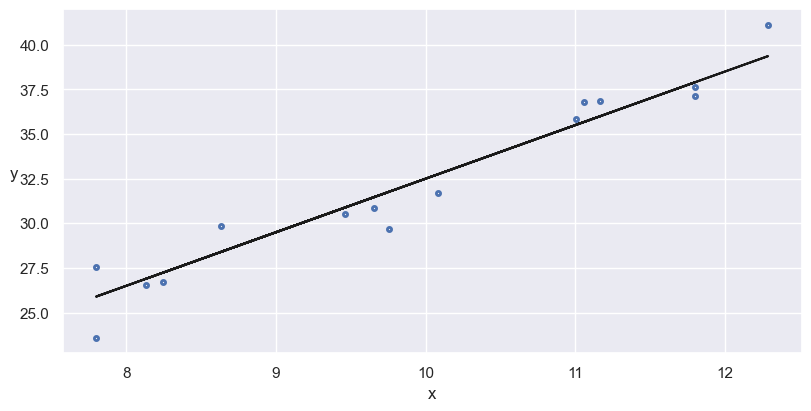

In [20]:
np.random.seed(1)
N = 15

#real parameters have a final '0' in their names.
alpha0  = 2.5
beta0   = 3
eps0    = np.random.normal(0, 1, size=N)

# the x are generared according to N(mean=10, sigma=2)
x       = np.random.normal(10, 2, N)
y       = alpha0 + beta0 * x 
y_obs   = y + eps0


fig = plt.figure(figsize=(8, 4))
ax  = plt.axes()

#plot noisy observations
ax.plot(x, y_obs, 'C0.')
ax.set_xlabel('x')
ax.set_ylabel('y', rotation=0) 

#plot the actual model
ax.plot(x, y, 'k'); 

# Fitting linear regression on the data

Estimated intercept: 
 0.52
Estimation  error: 
 1.98


Estimated beta: 
 [3.19]
Estimation  error: 
 [0.19]


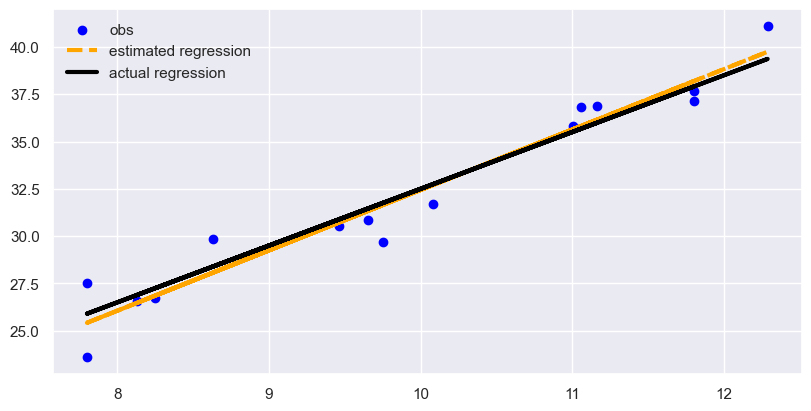

In [23]:
from sklearn import  linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using all observations
#We need to reshape x to feed the model
regr.fit(x.reshape(-1,1), y_obs)
y_pred = regr.predict(x.reshape(-1,1))


# print the coefficients
print("Estimated intercept: \n",  np.round(regr.intercept_,2))
print("Estimation  error: \n",  np.round(np.abs(regr.intercept_ - alpha0),2))
print("\n" )
print("Estimated beta: \n",  np.round(regr.coef_,2))
print("Estimation  error: \n",  np.round(np.abs(regr.coef_ - beta0),2))

plt.figure(figsize=(8, 4))
plt.scatter(x, y_obs, color="blue", label='obs')
plt.plot(x, y_pred, color="orange", linewidth=3, linestyle='dashed', label='estimated regression');
plt.plot(x, y, color="black", linewidth=3, linestyle='solid', label='actual regression')
plt.legend();

# Shortcoming of least squares fitting

* The least square estimate, being based on the squared error, is  sensive to outliers.
* Moreover, it is important to account for the uncertainty of the parameter estimates when computing the predictions.
* What if we have related data sets, i.e., data collected from different hospitals about the same disease?

* We will see how the probabilistic approach to regression addresses  such problems.

# Probabilistic approach to linear regression



$$y \sim \mathcal{N}(\mu=\alpha + x \beta, \epsilon)$$

$y_i$ is a Gaussian  variable with:
* mean $\alpha + x_i \beta$ 
* standard deviation $\sigma_{\epsilon}$.  

A linear regression is a Gaussian model whose mean is a linear function of the covariates.

# Priors

* The parameters of the model are  $\alpha$, $\beta$ and $\epsilon$. 

* We have to assign priors to them.

* A possible choice  priors is to assign Gaussian priors to $\alpha$ and $\beta$, and half-normal prior to $\sigma_{\epsilon}$:
$$
\alpha \sim \mathcal{N}(\mu_\alpha, \sigma_\alpha) \\
\beta \sim \mathcal{N}(\mu_\beta, \sigma_\beta) \\
\epsilon \sim |{N}(0, \sigma_\epsilon)| 
$$


# Priors

* In general  we do not have a very clear idea about what the  value of the parameters. 

* We thus set  priors which are large compared to the scale of the data.

* Using standardized data simplify this choice.

# Kruschke's diagram 

<img src='img/diagram-lin-reg.png' width=500 align="center" >

* The symbol '~' defines parameters ($\alpha, \beta, \sigma_{\epsilon}$)
* The symbol  '='  defines deterministic variables such as  $\mu$ 



# Weakly informative priors

Intercept:
* $\mu_\alpha$=0
* $\sigma_\alpha$ = 10 $\sigma_y$ 

Slope
* $\mu_\beta$=0
* $\sigma_\beta$ = 10 $\sigma_y$ 

Noise
* $\sigma_\epsilon$ = 10 $\sigma_y$ 


# Linear regression in PyMC3

# following model does not sample!!

In [ ]:
with pm.Model() as reg_model:
    #priors on coefficients
    alpha = pm.Normal ('alpha', mu=0,  sd=y.std())
    beta   = pm.Normal ('beta',    mu=0,  sd=y.std())
    
    #The prior on sigma_eps allows the parameter to practically vary  between 0 and  3*sigma_y. 
    #This is indeed a wide range, since the variance of the noise is generally smaller than sigma_y.
    sigma_eps = pm.HalfNormal ('sigma_eps', sd= y.std())
    
    # mu  is expressed  as a deterministic variable; in this way PyMC3 saves  its values   in the trace.
    # this is heplful if we want to inspect our uncertainty about the estimated regression line, as we will do later.
    mu = pm.Deterministic('mu', alpha + beta * x)
    
   #alternative formulation, which does not save mu in the trace
    #y_pred = pm.Normal('y_pred', mu= α + β * x, sd=ε, observed=y)
  
    #this is the likelihood (observation model)
    y_pred = pm.Normal('y_pred', mu=mu, sd=sigma_eps, observed=y_obs)
    
    trace_g = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_eps, beta, alpha]


# Discussion
* Some warnings are returned.
* To explore the results of our inference, we are  generate a trace plot, omitting the deterministic variable. 
* We  do so by passing the names of the variables we want to include in the plot, using  the 'var_names' argument.

In [14]:
az.summary(trace_g, var_names=['alpha', 'beta', 'sigma_eps'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,2.5,0.0,2.5,2.5,0.0,0.0,8.0,14.0,1.69
beta,3.0,0.0,3.0,3.0,0.0,0.0,8.0,12.0,1.77
sigma_eps,0.0,0.0,0.0,0.0,0.0,0.0,4.0,11.0,4.03


In [ ]:
az.plot_trace(trace_g, var_names=['alpha', 'beta', 'sigma_eps']);

In [ ]:
az.plot_pair(trace_g, var_names=['alpha', 'beta',]);

# Correlation between  parameters in the posterior
* The correlation between the samples of $\alpha$ and $\beta$ can be explained as follows.

* By providing on $\alpha$ and $\beta$, we consider a range of  values for both parameters, not only a point estimate. 

* However, chosen the intercept, the  most likely = value of the slope is such that the fitted line  pass close to  ($\bar{x}, \bar{y}$).




# Correlation between  parameters in the posterior


* An increase in the slope means a decrease of the intercept and vice versa. This causes the correlation between parameters.  

* The shape of the posterior (excluding  $\sigma$) is almost a diagonal space. 

* We are in practice spinning a  line fixed at the center of the data.

* This can be problematic for  the sampling algorithm: samples  samples  become highly autocorrelated and  sampling becomes slow. 

# Centering the data
* We can  remove the correlation between $\alpha$ and $\beta$ in the posterior by centering $x$:
$$x_i' = x_i' - \bar{x}$$ 

* The mean of  $x'$ is 0.
* The pivot point when changing the slope is exactly the intercept. 
* Hence the slope can vary independently from the intercept.
* Centering data  also helps in interpreting the results. The intercept is the value of   when  $x$=0; this is  meaningless if $x$ is  quantity such as the height or weight.
* When centering the variables, the intercept is  the value of $y$ corresponding to the mean value of $x$  .

# Standardizing the data
Standardizing is  common  in statistics and ML since many algorithms behave better when the data is standardized.  This transformation is achieved by centering the data and dividing it by the standard deviation:

We transform  each data point as:
\begin{align}
x_i' & = \frac{x_i-\bar{x}}{\sigma_x}\\
y_i' & = \frac{y_i-\bar{y}}{\sigma_y}
\end{align}


# Standardizing the data
* Besides removing autocorrelation, by standardizing the data  we can always use the same  priors without  worrying about the scale of the data. 

* For standardized data:

    * the intercept is around 0.
    * the slope is generally restricted in [-1, 1]. 

* Recall that in linear regression:
$$\hat{\beta} = R \frac{s_y}{s_x} $$

* With standardized data. $s_y$ = $s_x$=1. 
* $R$ varies in [-1,1] by definition.
* With multiple regression, the situation is more complex but the intuition remain valid; however we do not force the prior to be strictly  bounded in [-1,1]


# Standardizing the data
*  Standardizing the data allow us to talk in terms of Z-scores, that is, in units of standard deviations.

* A value of -1.3 in Z-score units means that the value in question is 1.3 standard deviations below the mean, irrespective of the scale of the data.
* A change in one Z-score unit is a change in one standard deviation, whatever the scale of the original data is. 
* This is useful dealing with several variables; having all of the variables in the same scale can simplify the interpretation of the data.

In [16]:
x_std = (x - x.mean()) /  x.std()
y_std = (y - y.mean()) /  y.std()

In [17]:
with pm.Model() as model_std:
    #priors on coefficients, no longer dependent on the scale of the data
    #We known that alpha will be around 0, while beta will be generally in [-1,1]. 
    #The priors below provide a large support, spanning practically the range [-3,3].
    alpha = pm.Normal ('alpha', mu=0, sd=1)
    beta   = pm.Normal ('beta',   mu=0,  sd=1)
    
    #prior on the standard deviation of the noise. The Half-Normal with sd=1 let  practically  sigma_eps vary between 0 and  3.
    #This is wide range, considering that the standardized y has standard deviation 1.
    sigma_eps = pm.HalfNormal ('sigma_eps', sd=1)
    mu              = pm.Deterministic('mu', alpha + beta * x_std)
    y_pred       = pm.Normal('y_pred', mu=mu, sd=sigma_eps, observed=y_std)

    trace_std = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_eps, beta, alpha]


/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/pymc3/step_methods/hmc/quadpotential.py:220: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(1, self._stds, out=self._inv_stds)
/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/pymc3/step_methods/hmc/quadpotential.py:199: RuntimeWarning: invalid value encountered in multiply
  return np.multiply(self._var, x, out=out)


RuntimeError: Chain 2 failed.

# No more correlation in the posterior...

In [ ]:
az.plot_pair(trace_std, var_names=['alpha', 'beta',], figsize=[8,4]);

## Interpreting and visualizing the posterior

* We now plot the average line that fits the data, which is obtained by using the posterior mean of $\alpha$ and $\beta$.
* The average line does not show our uncertainty on the estimate of the parameters.
* We will also plot a range around the line, showing the uncertainty about the fitted line. 
* This is a consequence of our uncertainty in the estimates of  $\alpha$ and $\beta$, which are characterized by a posterior distribution and not only by a point estimate.


# Showing our uncertainty on the estimated line (parameter uncertainty)

In [ ]:
#to quickly compute the plot, we pick one sample every 10 of the posterior
draws = range(0, len(idata.alpha.values),10)

#idata.alpha.values access the sampled values of alpha; likewise for idat.beta.values
#we show a different line for each caouple of (alpha, beta) in the posterior samples.
#This shows our uncertainty in the estimate of the line.
plt.plot(x_std,  idata.alpha.values[draws] + idata.beta.values[draws] * x_std[:, np.newaxis], c='gray', alpha=0.5)

#Here we use instead the point estimate, as  in traditional regression.
#Posterior mean of the parameters
alpha_m =  idata.alpha.values.mean()
beta_m   =  idata.beta.values.mean()

#Mean value of the regression line
plt.plot(x_std, alpha_m + beta_m * x_std, c='k',label='y = {:.2f} + {:.2f} * x'.format(alpha_m, beta_m))
plt.legend();

That uncertainty is lower in the middle, although it is not reduced to a single point, that is, the posterior is compatible with lines not passing exactly through the mean of the data, as we have already mentioned.

# Predictive checks (DOES NOT WORK)

* We can  plot the HPD (for example, 94% and 50%) of the predicted data, that is, where we expect to see the 94% and 50% of future data.
* Given the value $x_i$,  we compute the prediction corresponding to  sample $s$ of the posterior as::

    $$ \hat{y}_s = \alpha_{s} + \beta_{s} x_i + \epsilon_s$$



In [ ]:
ppc_std= pm.sample_posterior_predictive(trace_std, model=model_std, samples=2000)
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc_std, model=model_std));

In [ ]:
# does not work!!


# Prediction intervals

 * If  we have  a test value $x_j$, how do assess the uncertainty of our prediction about $y_j$?
 * We have a posterior distribution about $y_j$.
 * Let us denoting by $D$ the training data and by $\theta$ the vector of parameters: $\theta = [\alpha, \beta_1, .. \beta_k]$
 
 \begin{align}
 p(y_j|x_j,D) =  \int p(y_j|x_j,D)p(\theta|D) d\theta
 \end{align}
 
 
 

# Prediction intervals


 \begin{align}
 p(y_j|x_j,D) =  \int \underbrace{p(y_j|x_j,\theta,D)}_{\text{prediction made by a specific parameter value}} \underbrace{p(\theta|D)}_{\text{posterior of the parameters}} d\theta
 \end{align}
 
 * We are thus weighting the prediction made by different values of $\theta$ using their posterior distribution as weights. 
 
 

# Prediction intervals with samples.

In reality we have posterior samples. Let us denote a generic sample $s$ as $\theta_s$.
The posterior distribution of $y_j$ is obtained by computing for each sample $s$:

    $$ \hat{y}_{j,s} = \alpha_{s} + \beta_{s} x_j + \epsilon_s $$
 
 * The above formula express our uncertainty in $y_j$ considering:
     * the uncertainty in the parameters $\alpha$, $\beta$ (each couple ($\alpha_s, \beta_s$) yields a slightly different prediction)
     * the effect of the noise
 
 


 * Given the value $x_i$,  we compute the prediction corresponding to sample $s$ of the posterior as::

    $$ \hat{y}_s = \alpha_{s} + \beta_{s} x_i + \epsilon_s$$
    
* Thus intervals accounts for

    * the uncertainty in the estimates of the parameters (including noise in the estimate of $\sigma_{\epsilon}$
    * the noise which corrupts the data 
   
   See the following example recalling that: 
       * the 2.5 and 9.75 percentiles yield the 95% prediction interval
       * the 5 and the 95 percentile yield the 90% prediction interval

 

In [ ]:
x_test = 1.5
draws = range(0, len(idata.alpha.values))
preds = idata.alpha.values[draws] + idata.beta.values[draws] * x_test +  idata.sigma_eps.values[draws] 
pd.DataFrame(preds).describe (percentiles=[.025, .05, .5, .95, .975])

## Robust linear regression


* Gaussianity is often a reasonable approximation. 
* But sometimes the  Gaussian assumption fails, for example, in the presence of outliers. 
* The Student's t-distribution effectively deals with outliers and provides  a more robust inference. 
* This  idea can be applied also to linear regression.


# Anscombe quartet
* Four data sets whose summary statistics are identical, but vary considerably when graphed.
* We will use the third data set, which contains an outlier.

<img src='img/anscombe.png' width=400 align="center" >

In [ ]:
data = pd.read_csv('data/anscombe.csv')
x_3  = np.array(data[data.group == 'III']['x'].values)
y_3  = np.array(data[data.group == 'III']['y'].values)

#we also standardize the data
x_3_std = (x_3  - x_3.mean()) / x_3.std()
y_3_std = (y_3  - y_3.mean()) / y_3.std()

# Robust linear regression in PyMC3

In [ ]:
with pm.Model() as robust_model:
    #priors on intercept, slope and standard deviation of noise for standardized data
    alpha         = pm.Normal ('alpha', mu=0, sd=1)
    beta          = pm.Normal ('beta',   mu=0,  sd=1)
    sigma_eps     = pm.HalfNormal ('sigma_eps', sd=1)
    
    y_pred       = pm.StudentT ('y_pred', mu= alpha + beta * x_3_std,  sd=sigma_eps, nu=4, observed=y_3_std)    
    trace_t      = pm.sample(return_inferencedata=True)

 
# WAIC
* We can compare the two models using WAIC
* Point to be made here, or make a specific notebook dedicated to model selection?

In [ ]:
with pm.Model() as gaussian_model:
    #priors on intercept, slope and standard deviation of noise for standardized data
    alpha         = pm.Normal ('alpha', mu=0, sd=1)
    beta          = pm.Normal ('beta',   mu=0,  sd=1)
    sigma_eps     = pm.HalfNormal ('sigma_eps', sd=1)
    
    y_pred         = pm.Normal ('y_pred', mu= alpha + beta * x_3_std,  sd=sigma_eps, observed=y_3_std)    
    trace_normal   = pm.sample(return_inferencedata=True)

In [ ]:
az.compare({'robust_model':trace_t, 'normal_model': trace_normal}, ic='waic')

# Comment on the estimate
* As shown in next slide, the values of   $\alpha$, $\beta$   and $\sigma_{\epsilon}$ have very narrow HDI.
* Thus, there is little uncertainty in their estimates.
* Indeed, we are fitting a line to a perfectly aligned set of points, apart from the outlier.

In [ ]:
az.summary(trace_t)

# Robust vs non-robust fit
* We now compare the robust fit, according to model_t, and the non-robust fit obtained  SciPy's linear regression (this is very close to the straight line to the gaussian model, using the posterior mean of $\alpha$ and $\beta$). (you can add it as an exercise).

In [ ]:
beta_c, alpha_c = stats.linregress(x_3_std, y_3_std)[:2]

# plotting least-square regression
plt.figure(figsize=(8, 4))
plt.plot(x_3_std, (alpha_c + beta_c * x_3_std), 'k', label='least_squares', alpha=0.5)
plt.plot(x_3_std, y_3_std, 'C0o')

#posterior mean of the parameters
post_t         = az.extract_dataset(trace_t)
alpha_t       = post_t.alpha.values.mean()
beta_t         = post_t.beta.values.mean()

# plotting robust regression, using for simplicity the posterior mean of the parameters
plt.plot(x_3_std, alpha_t + beta_t * x_3_std, c='k', label='robust')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', rotation=0, fontsize=16)
plt.legend();

# Discussion

* The least-squares fit tries to compromise and include all points.
* The robust model automatically discards the outlier and fits a line that passes exactly through all the remaining points. 
* This is  a  peculiar dataset, but the message remains for more real and complex ones. 
* A Student's t-distribution, due to its heavier tails, is able to give less importance to points that are far away from the bulk of the data, filtering outliers in an automatic way.

# mettere un esempio di multiple linear regression (con parametro shape in pymc3) e discutere regularizing priors come nel libro di Martin

# possible exercises: see end of the chapter

1. En la siguiente definición de modelo probabilístico cual es el _likelihood_, cual es el _a priori_ y cual el _a posteriori_.

$$
y_i \sim Normal(\mu, \sigma) \\
\mu \sim Normal(0, 10) \\
\sigma \sim HalfNormal(25)
$$

2. En el modelo del punto 1 ¿cuántos parámetros hay en el posterior? o expresado de otra forma ¿cuántas dimensiones tiene el _a posteriori_?

3. Escriba el teorema de Bayes para el modelo del punto 1.

4. En el siguiente modelo ¿cuál es el modelo lineal?¿cuál el likelihood y cuantos parámetros hay en la distribución a posteriori?

$$
y \sim Normal(\mu, \epsilon) \\
\mu = \alpha + \beta x \\
\alpha \sim Normal(0, 10) \\
\beta \sim Normal(0, 1) \\
\epsilon \sim HalfNormal(25) \\
$$


5. Para el modelo del punto 1, asumiendo que tiene 57 datos provenientes de una gaussiana con media 4 y desviación estándar 0.5, obtenga usando PyMC3:
    * La distribución a posteriori
    * La distribución a priori
    * La distribución predictiva a posteriori 
    * La distribución predictiva a priori

tip: además de `sample` PyMC3 tiene varias funciones para muestrear 

6. Ejecuta el modelo `model_g`:
    * Usando NUTS (sampler por defecto)
    * Usando Metropolis

Compare los resultados usando funciones de ArviZ como `plot_trace` y `plot_pairs`. Centre la variable $x$ y repita el ejercicio ¿Qué opina?


7. Usando el conjunto de datos `howell` (disponible junto con esta notebook) realice un modelo lineal del peso ($x$) versus la altura ($y$). Excluya a los menores de 18 años. Exponga los resultados.

8. Para 4 individuos se registraron los pesos (45.73, 65.8, 54.2, 32.59), pero no las alturas. Usando el modelo del punto anterior prediga la altura esperada para cada individuo junto con un intervalo de credibilidad del 50% y del 89%.

9. Repita el punto 7 pero para los menores de 18 años. Exponga los resultados.

10. Es conocido que para muchas especies el peso no escala con la altura, pero si el logaritmo del pesos. Use esa información para ajustar el conjunto de datos `howell` (sin distinción por edad). Repita el ajuste usando un polinomio de grado 2. Explique y compare ambos resultados.

11. Piense en un modelo que sea capaz de ajustar los 3 primeros conjuntos del cuarteo de Anscombe, y en uno que sea capaz de ajustar los 4.

12. Para el modelo `hierarchical_model` repita la figura donde se representan los 8 grupos y las 8 lineas ajustadas, pero esta vez incluyendo la incertidumbre del ajuste.

13. Escriba en PyMC3 un modelo lineal para predecir la cantidad de papers que un estudiante de doctorado producirá en función de el tamaño del grupo donde trabaja el estudiante, la cantidad de fondos que recibe el grupo, el género del estudiante ¿Cómo cambia el modelo si se asume género binario o género categórico (más de dos opciones)?

14. Supongamos que el siguiente enunciado es cierto "las ciudades en Argentina con más policías tienen más delitos" ¿Quiere decir esto que la policía Argentina es corrupta?

15. Lea este [post](https://twiecki.github.io/blog/2017/02/08/bayesian-hierchical-non-centered/) y replique los resultados usted mismo.